<a href="https://colab.research.google.com/github/KrysnaRachmatR/PCVK_GANJIL_2023/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Krysna Rachmat Ramadhan Budiono

Kelas : TI - 3C

Absen : 14

NIM : 2141720219

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**C. DASAR TEORI**
**C.1 Konsep Feature Matching**

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [30]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(10,12))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

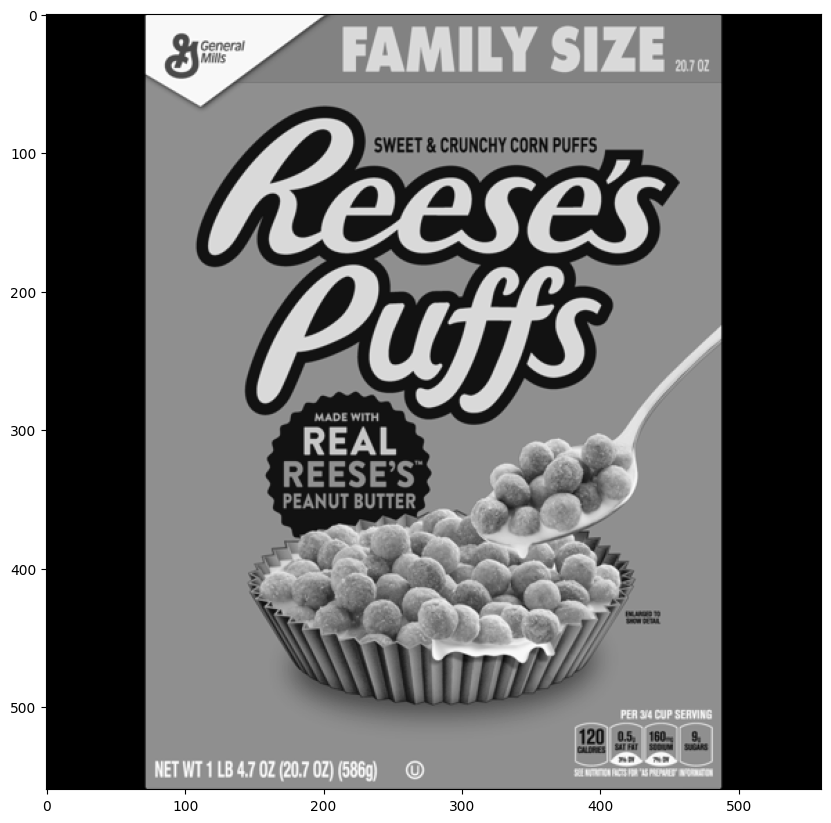

In [31]:
reeses = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/facedet/reeses_puffs.png',0)
display(reeses)

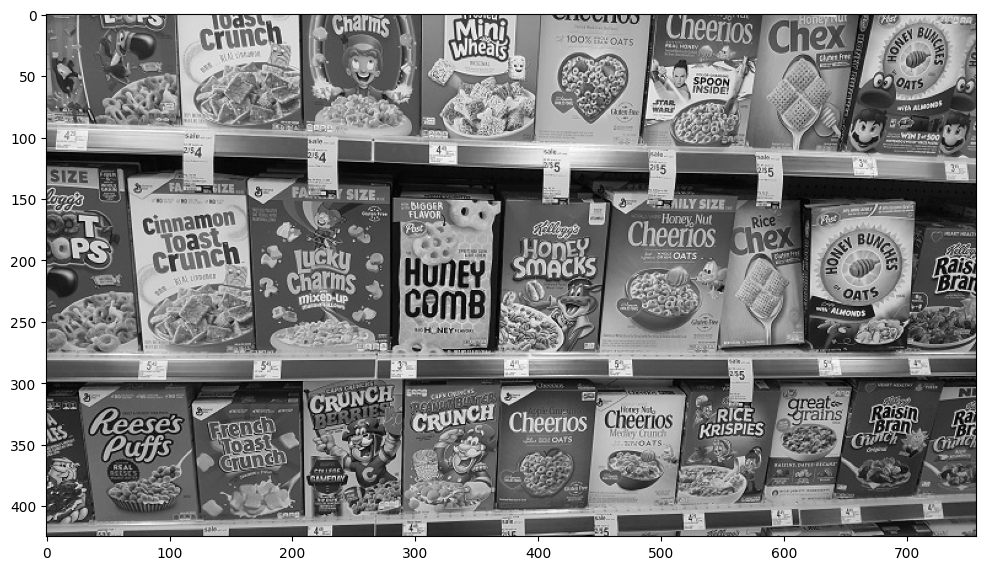

In [6]:
cereals = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/facedet/many_cereals.jpg',0)
display(cereals)

In [7]:
orb = cv.ORB_create()
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)
bf = cv.BFMatcher(cv.NORM_HAMMING,crossCheck = True)
matches = bf.match(des1,des2)
single_match = matches[0]
single_match.distance


71.0

In [8]:
len(matches)

139

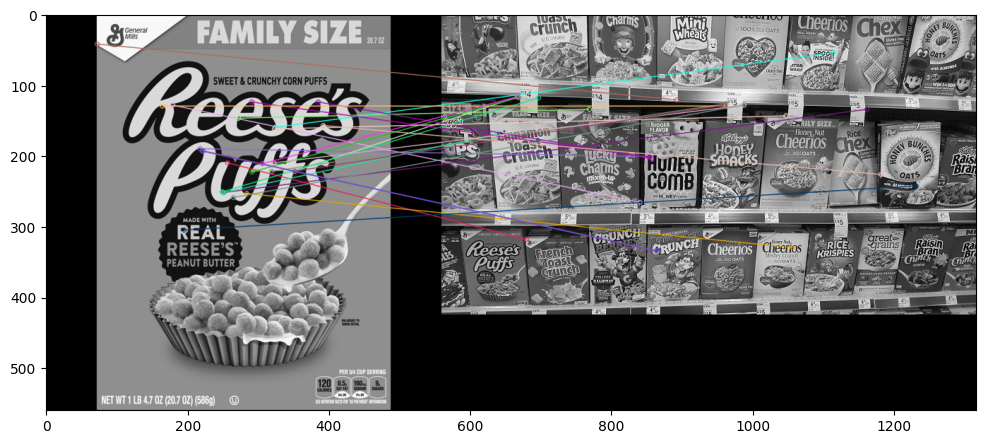

In [9]:
matches = sorted(matches,key=lambda x:x.distance)
reeses_match = cv.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_match)

In [10]:
sift = cv.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []

#Makin kecil jarak makin cocok
#ratio match < 75% Match2
for match1,match2 in matches:
  #jika jarak match1 lebih kecil dari jarak 75% match2
  #description disimpan
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

len(good)

79

In [11]:
len(matches)

1501

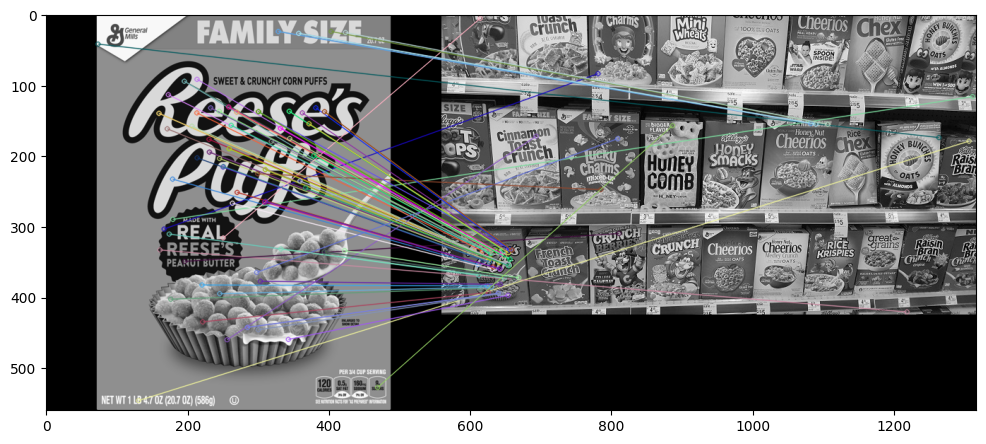

In [12]:
sift_matches = cv.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
display(sift_matches)

**C.2 Konsep Face Detection**

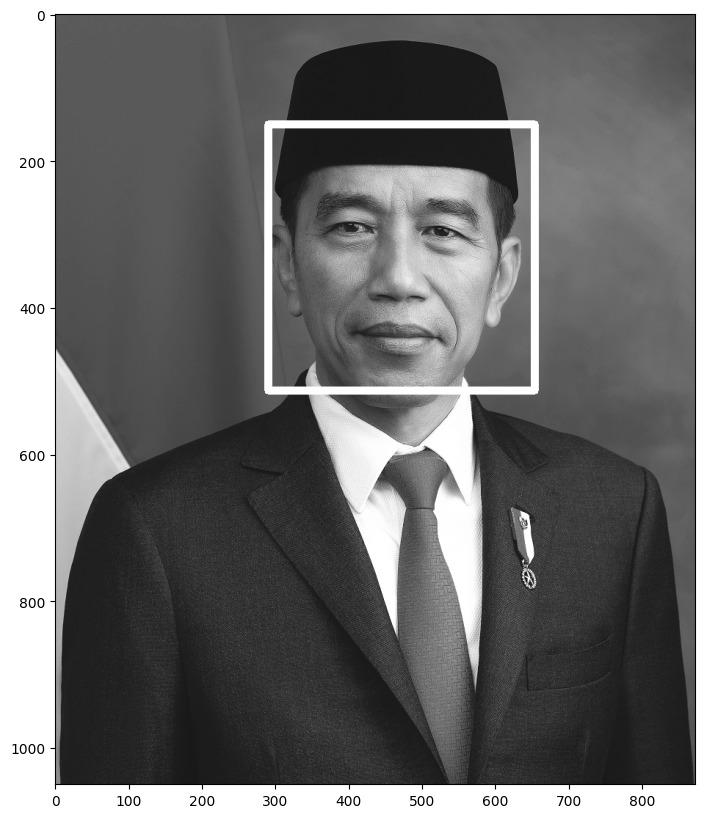

In [38]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK_MM/Images/haarcascades/haarcascade_frontalface_alt.xml')

jokowi = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/facedet/jokowi.jpg',0)
roi_wajah = cascade_wajah.detectMultiScale(jokowi)
for(x,y,w,h) in roi_wajah:
  cv.rectangle(jokowi, (x,y), (x+w,y+h), (255,255,255),10)
plt.figure(figsize = (10,10))
plt.imshow(jokowi, cmap='gray')

**D. TUGAS PRAKTIKUM**
Catatan: Untuk gambar pada praktikum ini menggunakan gambar pada link berikut:

Dataset

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, buat notebook baru dan beri nama “Week12.ipynb”. Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan seperti biasa.

2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet). Tampilkan seperti pada contoh berikut.

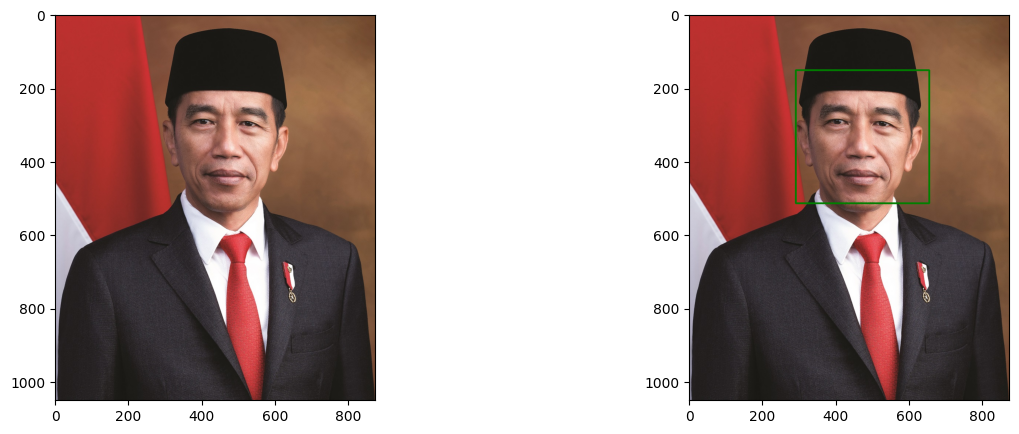

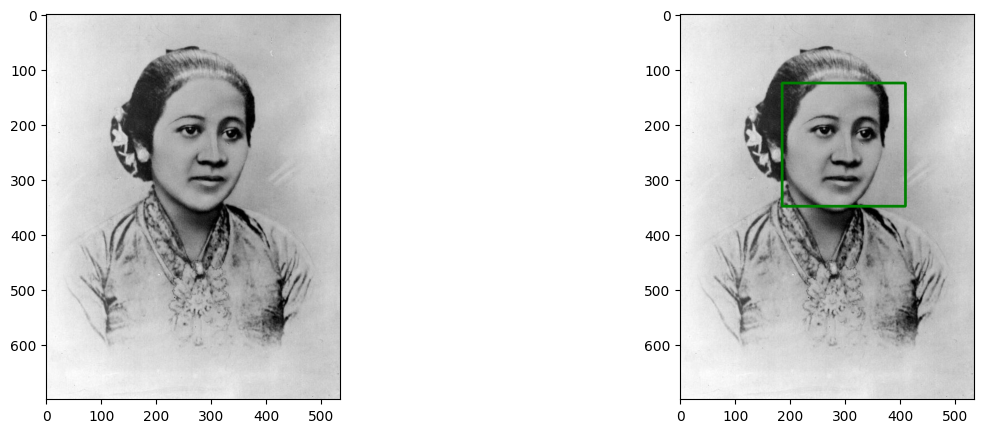

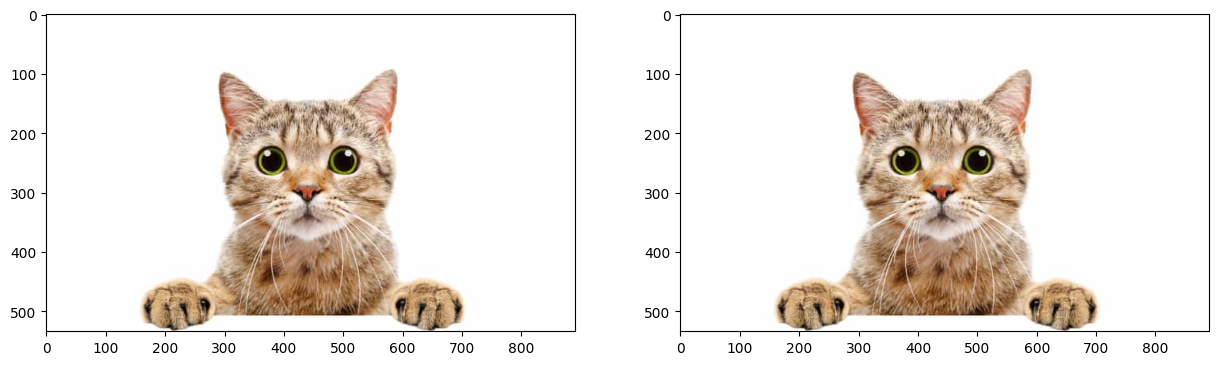

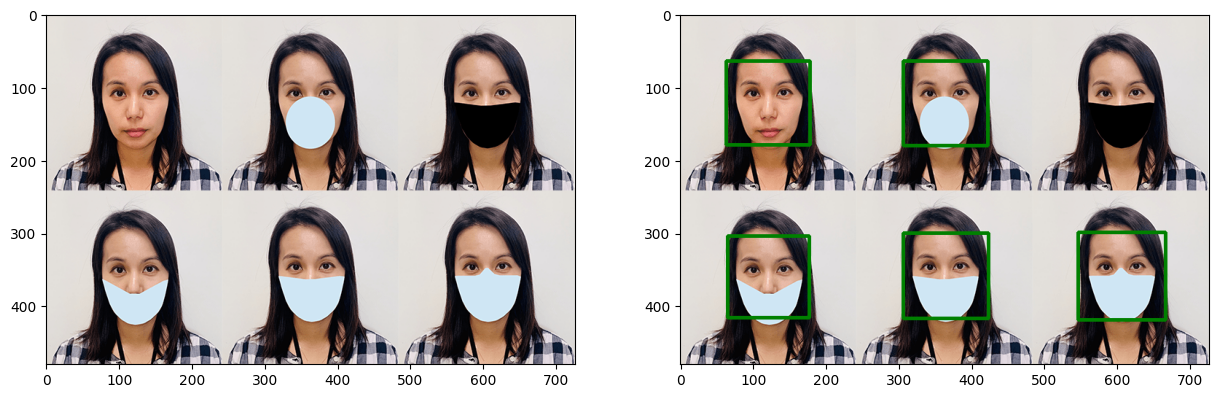

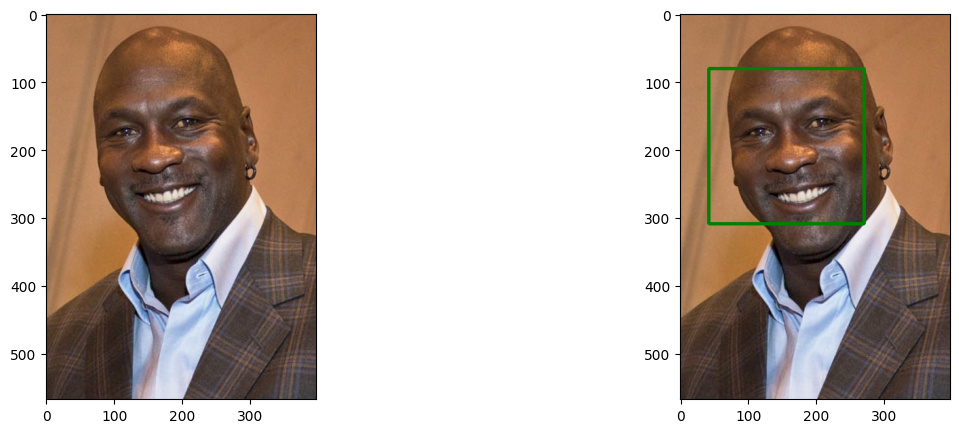

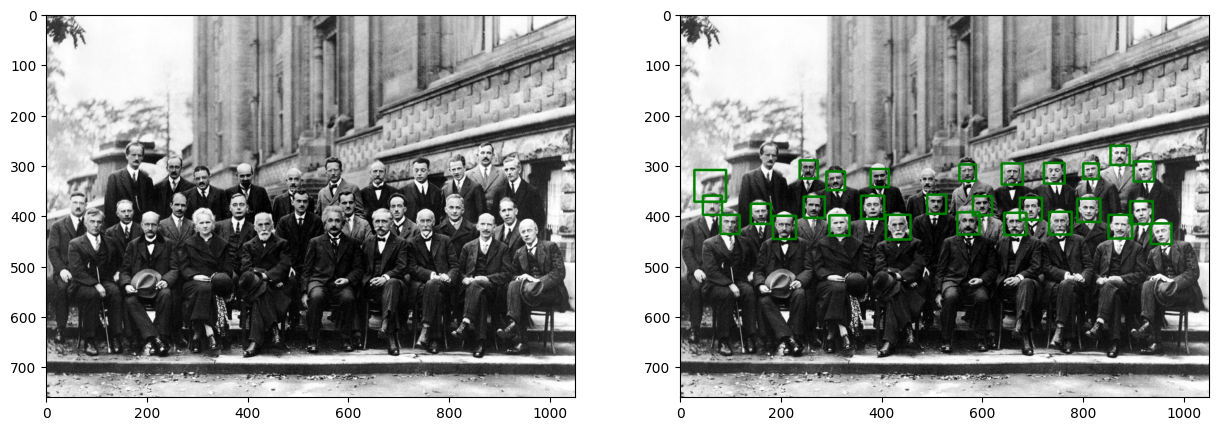

In [14]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK_MM/Images/haarcascades/haarcascade_frontalface_alt.xml')
data = ['/content/drive/MyDrive/PCVK_MM/Images/facedet/jokowi.jpg',
        '/content/drive/MyDrive/PCVK_MM/Images/facedet/kartini.jpg',
        '/content/drive/MyDrive/PCVK_MM/Images/facedet/kucing.jpg',
        '/content/drive/MyDrive/PCVK_MM/Images/facedet/mask.png',
        '/content/drive/MyDrive/PCVK_MM/Images/facedet/mjordan.jpg',
        '/content/drive/MyDrive/PCVK_MM/Images/facedet/solvayconf.jpg'
        ]
for i in data:
  image = cv.imread(i)
  image_ori = cv.imread(i)
  roi_wajah = cascade_wajah.detectMultiScale(image)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(image,(x,y),(x+w,y+h),(0,128,0),3)
  f, axarr = plt. subplots(1,2,figsize=(15,5))
  plt.subplot(121),plt.imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  axarr[0].imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  plt.subplot(122),plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  axarr[1].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  plt.show()

Perhatikan pada hasil face detection diatas. Secara keseluruhan, face detection dapat dilakukan dengan baik, bahkan untuk image berupa gambar bukan foto, wajah bermasker, atau wajah yang berukuran kecil (solvay).






3. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini, perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada
jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui search engines.



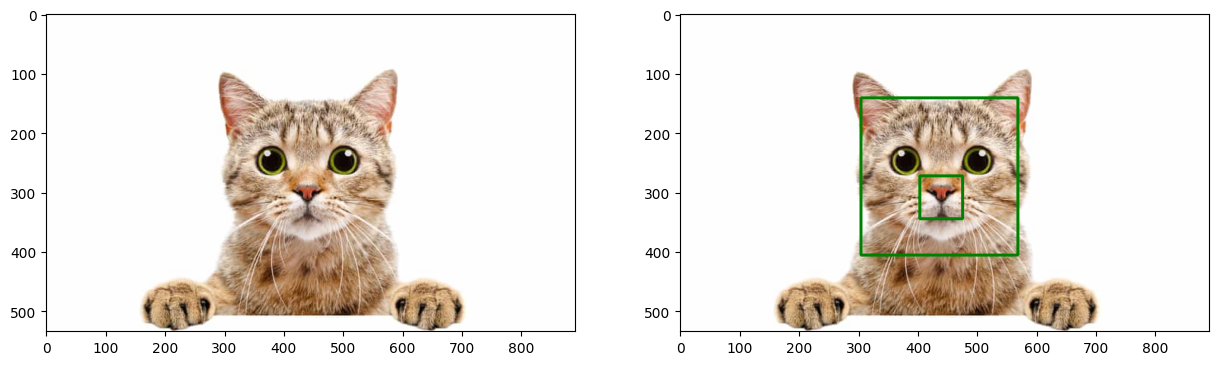

In [15]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK_MM/Images/haarcascades/haarcascade_frontalcatface_extended.xml')
data = ['/content/drive/MyDrive/PCVK_MM/Images/facedet/kucing.jpg']

for i in data:
  image = cv.imread(i)
  image_ori = cv.imread(i)
  roi_wajah = cascade_wajah.detectMultiScale(image)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(image,(x,y),(x+w,y+h),(0,128,0),3)
  f, axarr = plt. subplots(1,2,figsize=(15,5))
  plt.subplot(121),plt.imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  axarr[0].imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  plt.subplot(122),plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  axarr[1].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  plt.show()

4. Cobakan juga untuk eyes detection


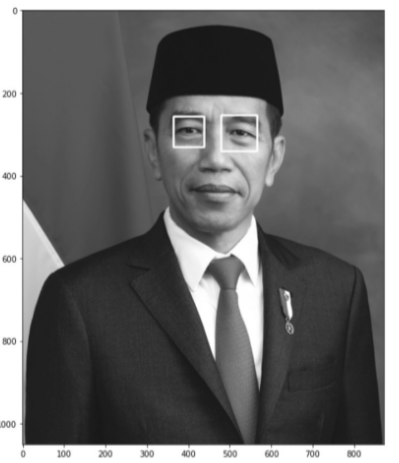

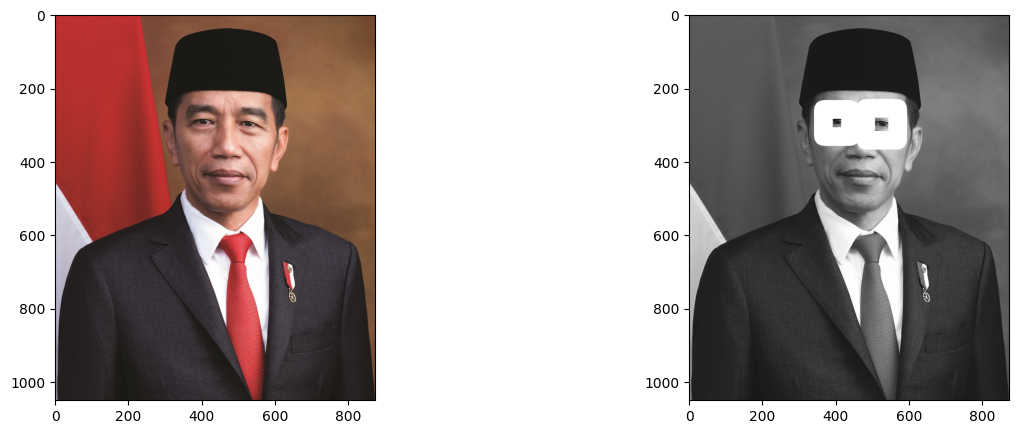

In [39]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK_MM/Images/haarcascades/haarcascade_eye.xml')
data = ['/content/drive/MyDrive/PCVK_MM/Images/facedet/jokowi.jpg']

for i in data:
  image = cv.imread(i)
  image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  image_ori = cv.imread(i)
  roi_wajah = cascade_wajah.detectMultiScale(image)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(image,(x,y),(x+w,y+h),(255,255,255),50)
  f, axarr = plt. subplots(1,2,figsize=(15,5))
  plt.subplot(121),plt.imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  axarr[0].imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  plt.subplot(122),plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  axarr[1].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  plt.show()


5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link berikut: https://www.youtube.com/watch?v=YjWh7QvVH60

In [17]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time


In [18]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [19]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to Bismillah.jpg


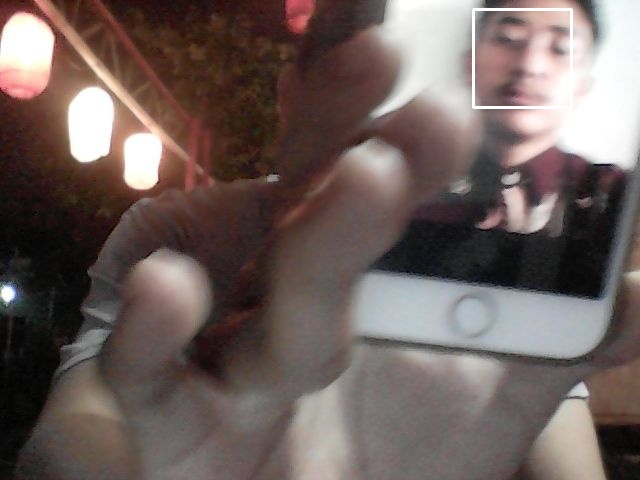

In [27]:
try:
  filename = take_photo('Bismillah.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

6. Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya.
Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

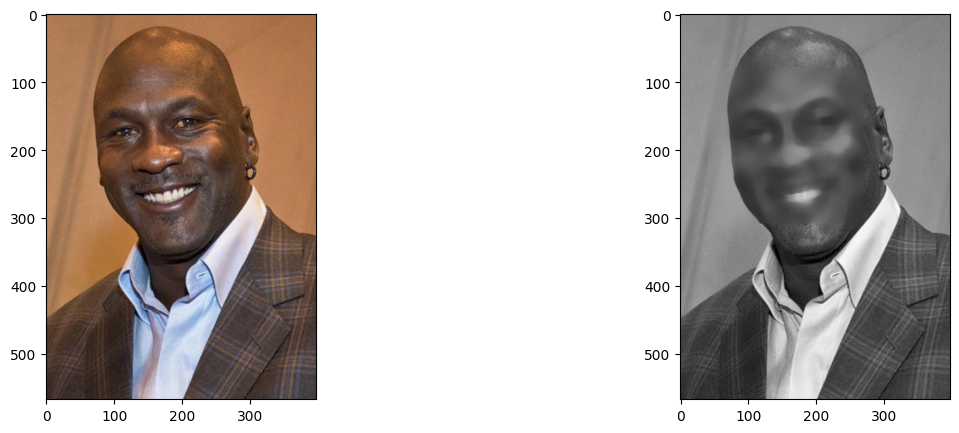

In [21]:
image_path = '/content/drive/MyDrive/PCVK_MM/Images/facedet/mjordan.jpg'
cascade_path = '/content/drive/MyDrive/PCVK_MM/Images/haarcascades/haarcascade_frontalface_alt.xml'

def overlay_faces(image_path, cascade_path):

    image = cv.imread(image_path)
    cascade = cv.CascadeClassifier(cascade_path)

    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    faces = cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        crop_image = image[y:y+h, x:x+w]
        image_blur = cv.medianBlur(crop_image, 19)
        overlay = cv.resize(image_blur, (w, h))
        image[y:y+h, x:x+w] = overlay[:, :, :3]

    # Display original and processed images
    f, axarr = plt.subplots(1, 2, figsize=(15, 5))
    axarr[0].imshow(cv.cvtColor(cv.imread(image_path), cv.COLOR_BGR2RGB))
    axarr[1].imshow(cv.cvtColor(image, cv.COLOR_BGR2GRAY), cmap='gray')  # Convert to grayscale

overlay_faces(image_path, cascade_path)

7. Lakukan segmentasi karakter pada KTP seperti gambar berikut

Kelompok

In [22]:
# Install Tesseract OCR
!sudo apt install tesseract-ocr-ind

# Install library pytesseract
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 15 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 1s (4,602 kB/s)
debconf: unable to ini

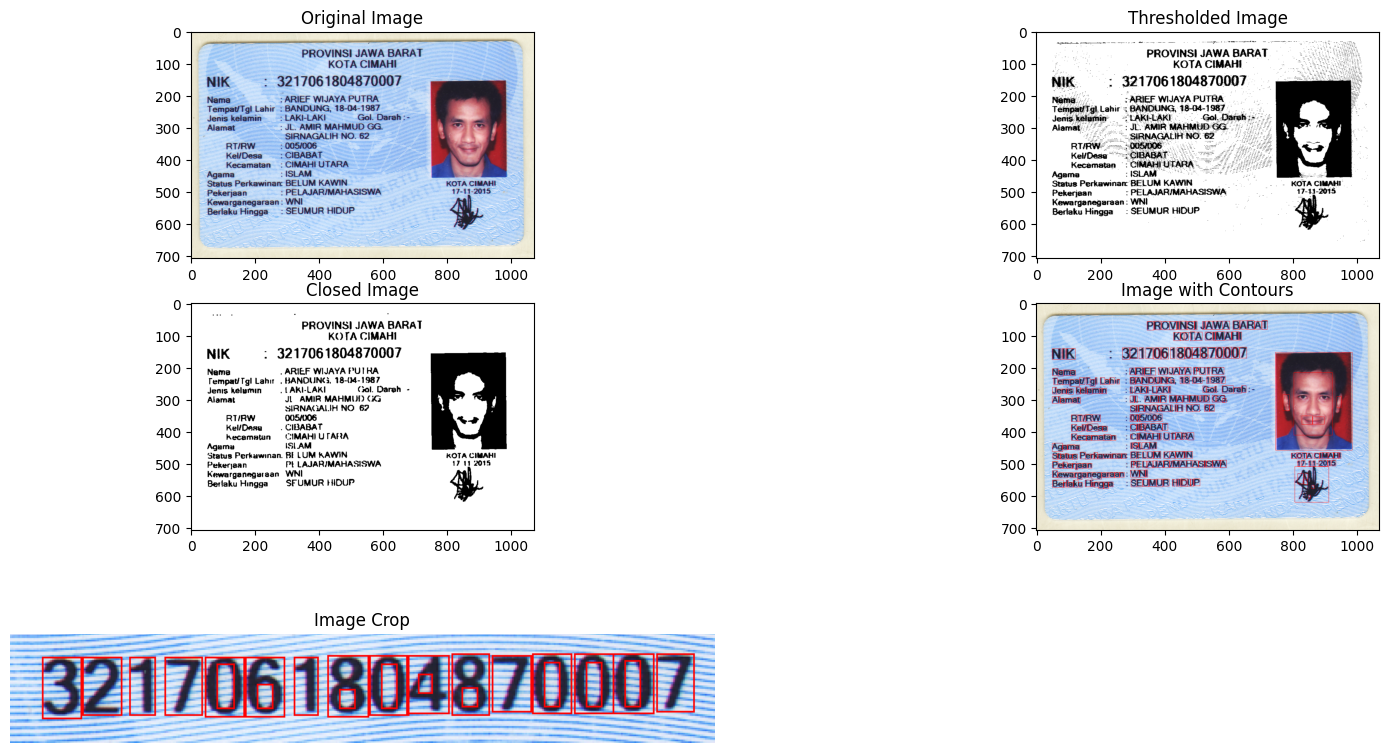

NIK pada e-KTP:  3217061804870007



In [23]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import pytesseract

ktp = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/KTP_More/ktp2.png')

# Convert the image to grayscale for edge detection
gray = cv2.cvtColor(ktp, cv2.COLOR_BGR2GRAY)

# Thresholding to create a binary image
ret, thresholded = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)


# Closing to fill gaps between characters
kernel_closing = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
closed = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel_closing)

# Find contours in the closed image
contours, hierarchy = cv2.findContours(closed, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a separate image
contour_image = ktp.copy()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv2.rectangle(contour_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 6 and float(ras) <= 6:
      cv2.rectangle(contour_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 15 and w >= 6 and float(ras) <= 7:
      cv2.rectangle(contour_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Crop image
crop_image = contour_image[125:190, 250:670]

# Create a subplot with 2 rows and 3 columns
plt.figure(figsize=(20, 10))

# Original Image
plt.subplot(3, 2, 1)
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Thresholded Image
plt.subplot(3, 2, 2)
plt.imshow(thresholded, cmap='gray')
plt.title('Thresholded Image')

# Closed Image
plt.subplot(3, 2, 3)
plt.imshow(closed, cmap='gray')
plt.title('Closed Image')

# Image with Contours
plt.subplot(3, 2, 4)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours')

# Image Crop
plt.subplot(3, 2, 5)
plt.axis('off')
plt.imshow(cv2.cvtColor(crop_image, cv2.COLOR_BGR2RGB))
plt.title('Image Crop')

plt.show()


# Mengeluarkan teks pada gambar

# Konversi gambar ke dalam format grayscale
gray_nik = cv2.cvtColor(crop_image, cv2.COLOR_BGR2GRAY)

# make more clear using closing
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(gray_nik, cv2.MORPH_CLOSE, kernel, iterations=1)
dilate = closing.copy()

# Praproses segmentasi teks menggunakan threshold dinamis
_, threshold_nik = cv2.threshold(dilate, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Contoh segmentasi teks menggunakan pytesseract
custom_config = r'--oem 3 --psm 6 outputbase digits'
nik_text = pytesseract.image_to_string(threshold_nik, config=custom_config)

# Tampilkan hasil pengenalan NIK
print("NIK pada e-KTP: ", nik_text)